## Nepreciznost - neodređenost


U realnim problemima postoji potreba za matamatičkim opisom i reprezentacijom znanja u uslovima neodređenosti.

Nepreciznosti i neodređenosti mogu da se analiziraju na nekoliko osnova:
 - nepreciznosti u ulaznim podacima
 - nepreciznosti kao rezultat merenje fizičkih veličina
 - nepreciznosti modela kojim je opisan fizički proces
 
U sledećim primerima pokazaćemo kako se nepreciznosti (greške) mogu reprezentovati, kakve posledice to može imati na rasuđivanje i analizu ponašanja procesa. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
%matplotlib inline
import pandas as pd
from matplotlib.patches import Circle

np.set_printoptions(precision=3)

## Primer 1

Posmatrajmo primer jednog prostog merenja veličina 

$xp=2$ i $yp=3$.

$xp$ i $yp$ su tačne vrednosti koje želimo da odredimo merenjima koje dobijamo pomoću mernog uređaja koji nam u 500 merenja da sledeće vrednosti.

In [2]:
xp=2
yp=3

x = xp+np.random.normal(0, 1, 500)
y = yp+np.random.normal(0, 1, 500)

Merene vrednosti možemo nacrtati na grafiku i videti njihovu raspodelu.

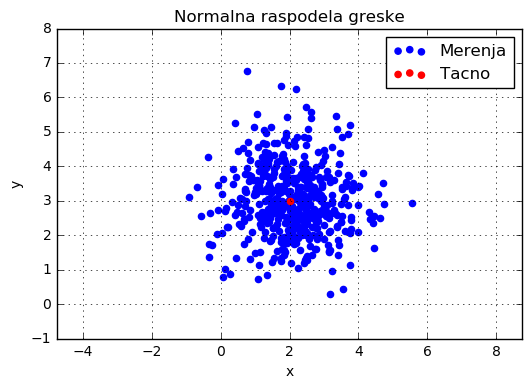

In [3]:
plt.scatter(x, y, color='b', label='Merenja');
plt.scatter(xp, yp, color='r', label='Tacno');
plt.legend()
plt.title('Normalna raspodela greske')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

Najjednostavniji metod za reprezentaciju nepreciznosti je da opišemo vrednosti sa nekom tolerancijom. 

U ovom primeru skup merenih tačaka zamenićemo krugom sa centrom u $(2,3)$ i poluprečnikom 3.



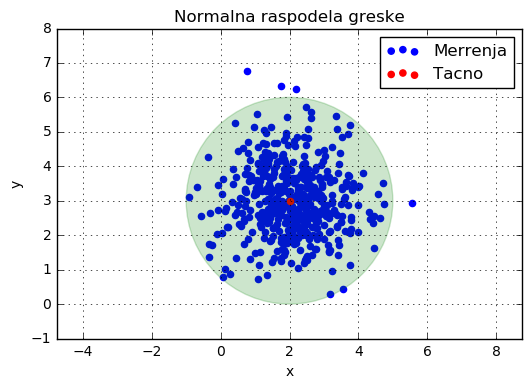

In [4]:
circle1 = plt.Circle((2, 3), 3, color='g', alpha=0.2)
ax = plt.gca()
ax.add_artist(circle1)

plt.scatter(x, y, color='b', label='Merrenja');
plt.scatter(xp, yp, color='r', label='Tacno');
plt.legend()
plt.title('Normalna raspodela greske')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

Ovako prikazano deluje kao 'jako' neprecizno. Međutim, ako prostor posmatranja proširimo vrednosti deluju preciznije.

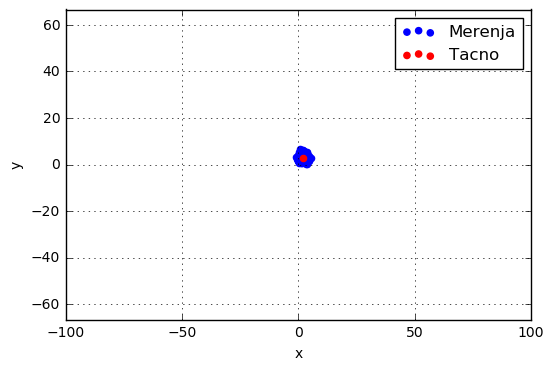

In [5]:
plt.scatter(x, y, color='b', label='Merenja');
plt.scatter(xp, yp, color='r', label='Tacno');
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.xlim(-100, 100);
plt.ylim(-100, 100);

Ili još 'preciznije'

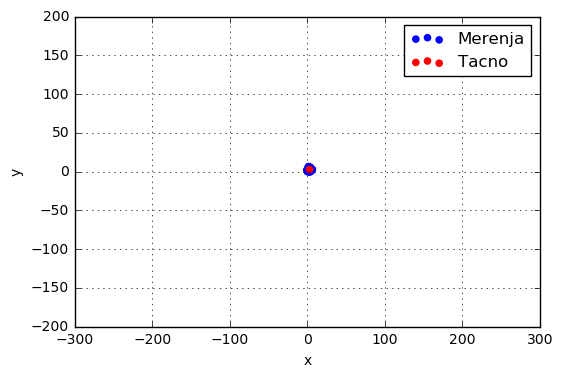

In [6]:
plt.scatter(x, y, color='b', label='Merenja');
plt.scatter(xp, yp, color='r', label='Tacno');
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.xlim(-300, 300);
plt.ylim(-300, 300);

## Analiza merenih vrednosti

Ako posmatramo prvih 5 izmerenih vrednosti na osnovu njih možemo proceniti tačnu vrednost prostim usrednjavanjem.

In [7]:
data = pd.DataFrame(np.column_stack((x,y)), columns=list('xy'))
data.head()

,x,y
0,1.973917,3.007489
1,0.671438,1.732088
2,3.637289,3.439761
3,1.848103,2.906622
4,2.533038,3.916849


Nakon 5 merenja procena za tačnom vrednošću je:

In [8]:
xpp, ypp = x.mean(), y.mean()

print (xpp, ypp)

(2.053212659352575, 3.0054050011192892)


Kako da odredimo koliko je dobro rešenje koje smo dobili?

Možemo izračunati variansu.

In [9]:
x_sd = ((x[:5].mean()-x[:5])**2).mean()

print x_sd

0.93311046261


Šta se dešava kad povećamo broj tačaka sa kojima računamo?

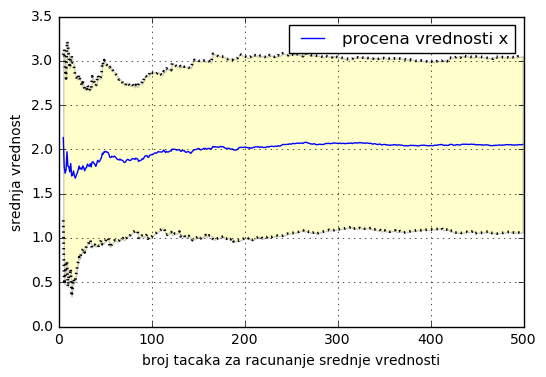

In [10]:
x_mm = []
x_sd  = []
t=range(5,len(x))
for i in t:
    x_mm.append(x[:i].mean())
    x_sd.append(((x[:i].mean()-x[:i])**2).mean())
    
x_sd = np.array(x_sd)
    
plt.plot(t, x_mm, color='b', label='procena vrednosti x')
plt.plot(t, x_mm+x_sd, linestyle=':', color='k', lw=2)
plt.plot(t, x_mm-x_sd, linestyle=':', color='k', lw=2)
plt.fill_between(t, x_mm+x_sd, x_mm-x_sd, facecolor='yellow', alpha=0.2);

plt.legend()
plt.xlabel('broj tacaka za racunanje srednje vrednosti')
plt.ylabel('srednja vrednost')
plt.grid(True)


Još malo o kvalitetu rešenja. 

Histogram kvadrata razlika od srednje vrednosti

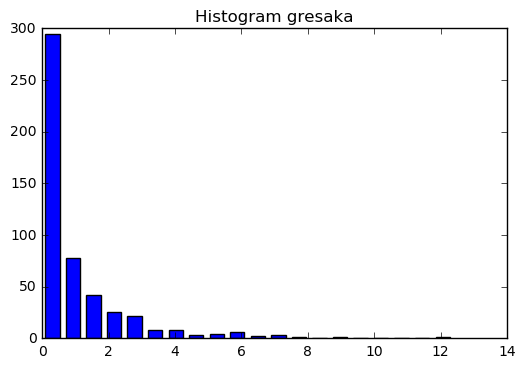

In [11]:
# kvadrat razlike izme]u srednje 
d = (x.mean()-x)**2

plt.title('Histogram gresaka')
hist, bins = np.histogram(d, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


### Šta ako su merene vrednosti ulaz u neki algoritam ili funkciju?

Recimo da se ova merenja koriste u funkciji:

$$
g(x) = \frac{1}{x}
$$

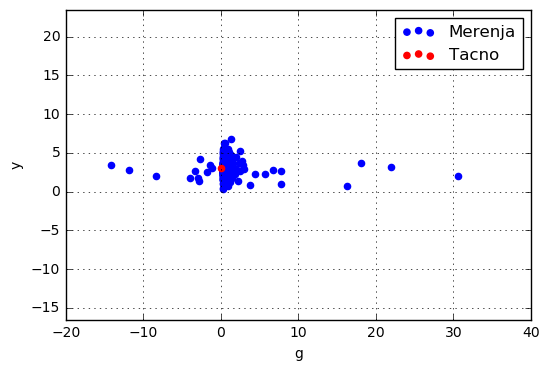

In [12]:
g = 1/x


plt.scatter(g, y, color='b', label='Merenja');
plt.scatter(1/xp, yp, color='r', label='Tacno');
plt.legend()
plt.xlabel('g')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

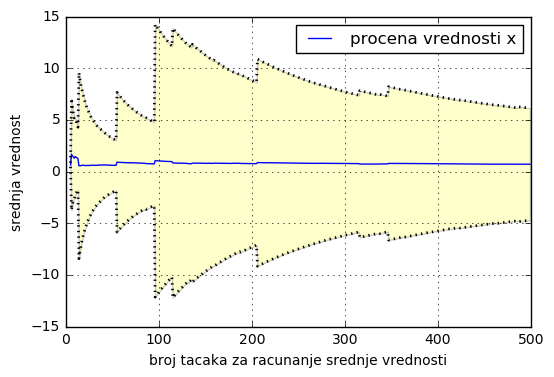

In [13]:
g_mm = []
g_sd  = []
t=range(5,len(g))
for i in t:
    g_mm.append(g[:i].mean())
    g_sd.append(((g[:i].mean()-g[:i])**2).mean())
    
g_sd = np.array(g_sd)
    
plt.plot(t, g_mm, color='b', label='procena vrednosti x')
plt.plot(t, g_mm+g_sd, linestyle=':', color='k', lw=2)
plt.plot(t, g_mm-g_sd, linestyle=':', color='k', lw=2)
plt.fill_between(t, g_mm+g_sd, g_mm-g_sd, facecolor='yellow', alpha=0.2);

plt.legend()
plt.xlabel('broj tacaka za racunanje srednje vrednosti')
plt.ylabel('srednja vrednost')
plt.grid(True)


Šta je sad ovo?

Nešto smo pogrešili!

Mislim da nismo, nego, funkcija $g(x)=\frac{1}{x}$ je osetljiva kad su izmerene vrednosti grškom blizu nule.

## Primer 2

U prethodnom primeru pretpostavili smo da je raspodela grešaka u merenju normalna. 

Međutim ako kažemo da je merenje u nekom intervalu onda je bilo koja vrednost iz intervala jednako verovatna i dobijamo sledeći slučaj.



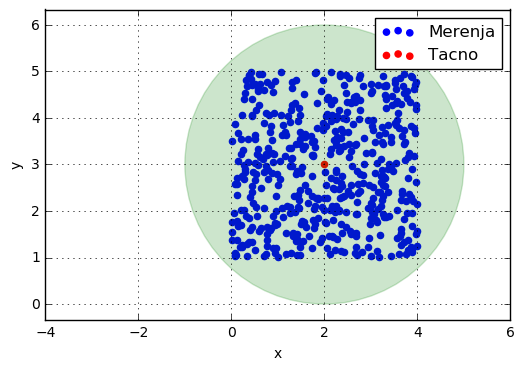

In [14]:
x = xp+np.random.uniform(-2, 2, 500)
y = yp+np.random.uniform(-2, 2, 500)

circle1 = plt.Circle((2, 3), 3, color='g', alpha=0.2)
ax = plt.gca()
ax.add_artist(circle1)

plt.scatter(x, y, color='b', label='Merenja');
plt.scatter(xp, yp, color='r', label='Tacno');
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

plt.xlim(-4, 6);
plt.ylim(-1, 7);



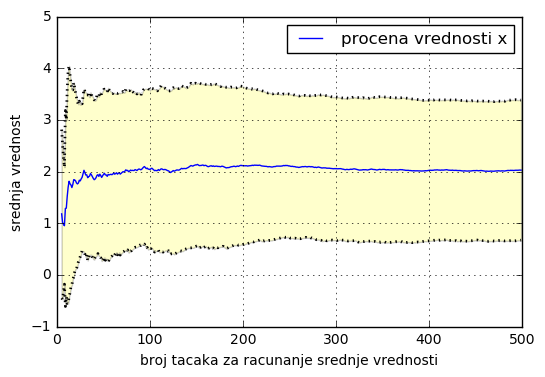

In [15]:
x_mm = []
x_sd  = []
t=range(5,len(x))
for i in t:
    x_mm.append(x[:i].mean())
    x_sd.append(((x[:i].mean()-x[:i])**2).mean())
    
x_sd = np.array(x_sd)
    
plt.plot(t, x_mm, color='b', label='procena vrednosti x')
plt.plot(t, x_mm+x_sd, linestyle=':', color='k', lw=2)
plt.plot(t, x_mm-x_sd, linestyle=':', color='k', lw=2)
plt.fill_between(t, x_mm+x_sd, x_mm-x_sd, facecolor='yellow', alpha=0.2);

plt.legend()
plt.xlabel('broj tacaka za racunanje srednje vrednosti')
plt.ylabel('srednja vrednost')
plt.grid(True)


### Šta ako su merene vrednosti ulaz u neki algoritam ili funkciju?

Recimo da se ova merenja koriste u funkciji:

$$
g(x) = \frac{1}{x}
$$

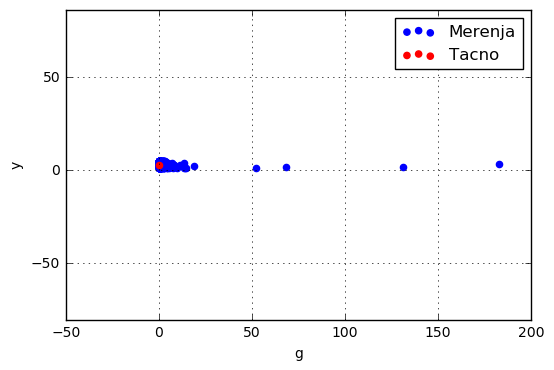

In [16]:
g = 1/x


plt.scatter(g, y, color='b', label='Merenja');
plt.scatter(1/xp, yp, color='r', label='Tacno');
plt.legend()
plt.xlabel('g')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

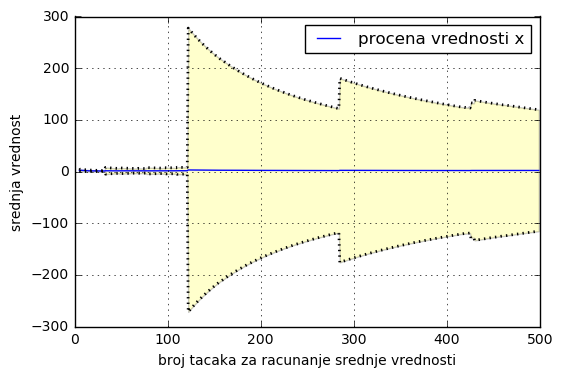

In [17]:
g_mm = []
g_sd  = []
t=range(5,len(g))
for i in t:
    g_mm.append(g[:i].mean())
    g_sd.append(((g[:i].mean()-g[:i])**2).mean())
    
g_sd = np.array(g_sd)
    
plt.plot(t, g_mm, color='b', label='procena vrednosti x')
plt.plot(t, g_mm+g_sd, linestyle=':', color='k', lw=2)
plt.plot(t, g_mm-g_sd, linestyle=':', color='k', lw=2)
plt.fill_between(t, g_mm+g_sd, g_mm-g_sd, facecolor='yellow', alpha=0.2);

plt.legend()
plt.xlabel('broj tacaka za racunanje srednje vrednosti')
plt.ylabel('srednja vrednost')
plt.grid(True)

In [18]:
print g.std()

10.8284019332


## Nepreciznosti dakle možemo da modeliramo 

- preciznim modelima (interval)
- probabilističkim modelima 
- fuzzy modelima

## Primer 3 - dinamički sistem

Neka je ponašanje sistema opisano linearnom diferencijalnom jednačinom:

$$
x'=Ax+b
$$

gde je $x$ vektor stanja, matrica $A$ i vektor $b$ predstavljaju karakteristike sistema.

Da bi sistem mogli rešiti potrebno je da znamo $x_0$.

$
x = \left[ \begin{array}{c} p \\ v \end{array} \right]
$

$p$ - pozicija a $v$ - brzina

$A = \begin{bmatrix} 2 & 0 \\ 0 & 0 \end{bmatrix}$ a $ b=\left[ \begin{array}{c} 1 \\ 0.3 \end{array} \right]$

Ako je $p_0$ rezultat merenja a njegovu vrednost možemo da opišemo vrednošću $(2, 0.5)$, gde je 2 očekivana tačna vrednost a 0.5 je očekivano odstupanje.


Eulerova metoda za rešavanje diff jednačine:


In [19]:
# u ternutku t=1 računamo novu vrednost za poziciju
t_0 = 0
dt = 0.1
p_0 = 2+np.random.normal(0, 0.5, 500)
v_0 = 0

p = p_0
v = v_0
t = t_0
pt = []
tt = []
it_max = 15

for it in range(it_max):
    p = p + (2*p+1)*dt
    v = v + 0.3    
    t = t + dt
    pt.append(p)
    tt.append(t)

pt = np.array(pt)
tt = np.array(tt)

Niz $pt$ sadrži moguća stanja sistema

In [20]:

# transformacije zbog lakšeg prikaza na grafikonu

t = []
p = []
po = []
to = []
so = []

for it in range(it_max):
    tn = tt[it]
    for pn in pt[it]:        
        t.append(tn)
        p.append(pn)
    to.append(tn)
    po.append(pt[it].mean())
    so.append(pt[it].std())        

po = np.array(po)        
so = np.array(so)

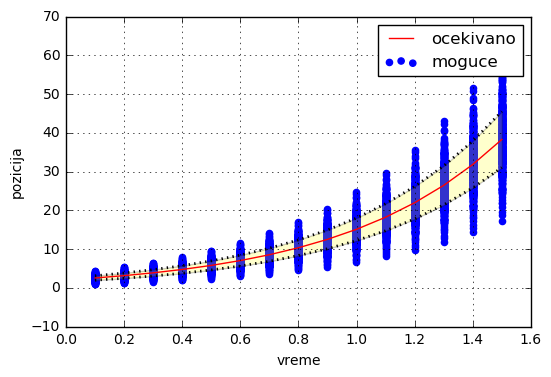

In [21]:
plt.scatter(t, p, color='b', label='moguce');
plt.plot(to, po, color='r', label='ocekivano');
plt.plot(to, po+so, linestyle=':', color='k', lw=2)
plt.plot(to, po-so, linestyle=':', color='k', lw=2)
plt.fill_between(to, po+so, po-so, facecolor='yellow', alpha=0.2);

plt.legend()
plt.xlabel('vreme')
plt.ylabel('pozicija')
plt.grid(True)

## Primer 4 - praćenje kretanja poljoprivredne mašine - GPS


Datoteke 

- 'data/gps_data_1.csv' - kretanje po parceli
- 'data/gps_data_2.csv' - kretanje po naselju
- 'data/gps_data_3.csv' - mirovanje

sadrže merenja po 3000 uzoraka čiji je format dat u nastavku:

```
#longitude, latitude, speed, pritisak, ddMMyy, hhmmss.ssss, cog, temperature, fix_status, protok
#---------------------------------------------------------------------------------
19.9908883333	45.4304116667	9.852	22.8	211116	093502.000	297.18	18.8	2	11.70
19.9908283333	45.4304333333	9.831	22.6	211116	093504.000	297.02	18.9	2	11.64
19.9907666667	45.430455	9.3	22.6	211116	093506.000	299.53	18.9	2	11.64
19.99064	45.4305033333	9.26	22.6	211116	093510.000	297.49	19.0	2	12.02
19.99058	45.430525	9.373	22.8	211116	093512.000	299.55	19.0	2	11.45
19.9905216667	45.4305483333	9.295	22.8	211116	093514.000	296.18	19.0	2	11.39
19.9904616667	45.43057	10.027	22.6	211116	093516.000	301.14	19.0	2	11.64
19.9904	45.4305916667	10.127	22.9	211116	093518.000	293.80	19.0	2	11.34

```

In [121]:
with open('data/gps_data_1.csv', 'r') as f:
    data = f.read()
#print data
geo = []
lines = data.split('\n')
for line in lines:
    parts = line.split('\t')
    if len(parts)>1:
        geo.append(np.array([float(parts[0]), float(parts[1]), float(parts[2])]))

geo = np.array(geo)

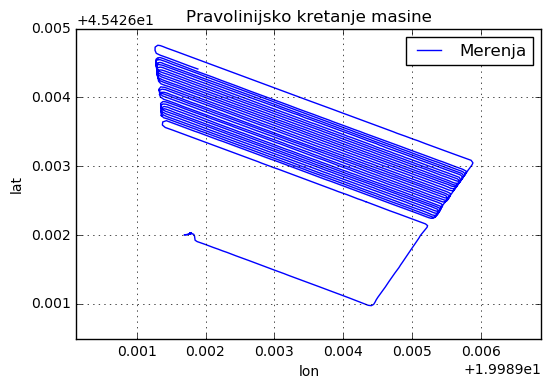

In [122]:
plt.plot(geo[:,0], geo[:,1], color='b', label='Merenja');
plt.legend()
plt.title('Pravolinijsko kretanje masine')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

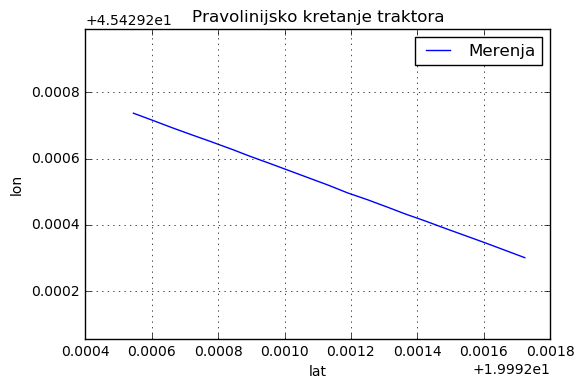

In [123]:
plt.plot(geo[50:70,0], geo[50:70,1], color='b', label='Merenja');
plt.legend()
plt.title('Pravolinijsko kretanje traktora')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

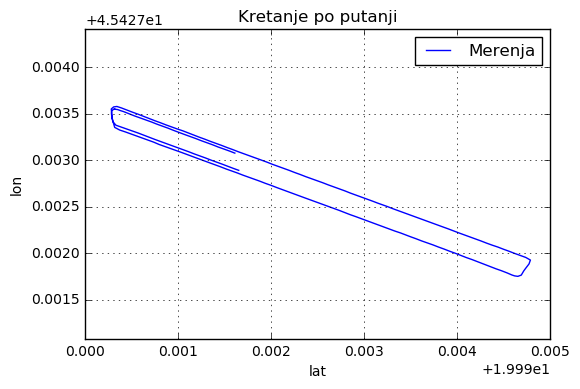

In [115]:
plt.plot(geo[150:370,0], geo[150:370,1], color='b', label='Merenja');
plt.legend()
plt.title('Kretanje po putanji')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

In [116]:
with open('data/gps_data_2.csv', 'r') as f:
    data = f.read()
#print data
geo = []
lines = data.split('\n')
for line in lines:
    parts = line.split('\t')
    if len(parts)>1:
        geo.append(np.array([float(parts[0]), float(parts[1])]))

geo = np.array(geo)

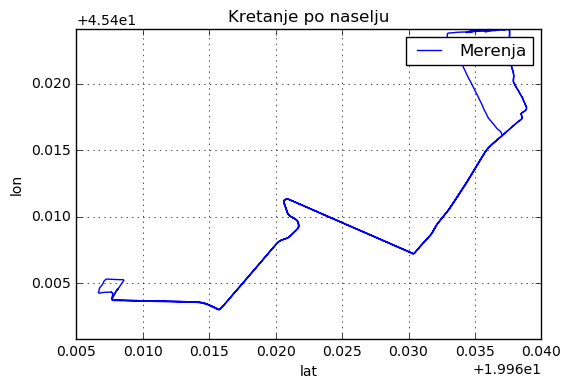

In [117]:
plt.plot(geo[:,0], geo[:,1], color='b', label='Merenja');
plt.legend()
plt.title('Kretanje po naselju')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

In [228]:
with open('data/gps_data_3.csv', 'r') as f:
    data = f.read()
#print data
geo = []
lines = data.split('\n')
for line in lines:
    parts = line.split('\t')
    if len(parts)>1:
        geo.append(np.array([float(parts[0]), float(parts[1])]))

geo = np.array(geo)

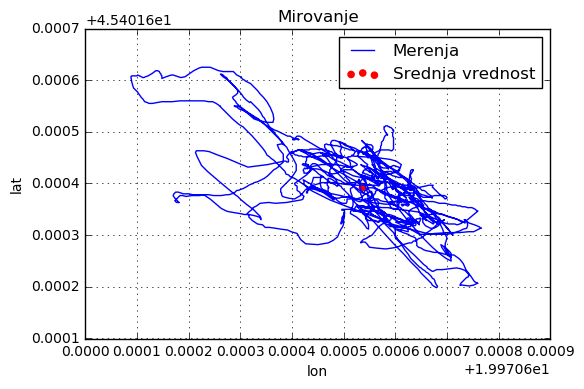

In [229]:
lonMean = geo[:,0].mean()
latMean = geo[:,1].mean()

plt.plot(geo[:,0], geo[:,1], color='b', label='Merenja');
plt.scatter([lonMean], [latMean], color='r', label='Srednja vrednost');
plt.legend()
plt.title('Mirovanje')
plt.xlabel('lon')
plt.ylabel('lat')
plt.axis('equal')
plt.grid(True)

In [230]:
import math
from math import sin, cos, atan2, sqrt

def distance(a, b):
    lng1, lat1 = a
    lng2, lat2 = b
    #return distance as meter if you want km distance, remove "* 1000"
    radius = 6371 * 1000 

    dLat = (lat2-lat1) * math.pi / 180
    dLng = (lng2-lng1) * math.pi / 180

    lat1 = lat1 * math.pi / 180
    lat2 = lat2 * math.pi / 180

    val = sin(dLat/2) * sin(dLat/2) + sin(dLng/2) * sin(dLng/2) * cos(lat1) * cos(lat2)    
    ang = 2 * atan2(sqrt(val), sqrt(1-val))
    return radius * ang


In [231]:
d1 = []

for p in geo[:,0:2]:
    dd1 = distance(p, (lonMean, latMean))
    d1.append(dd1)

d1 = np.array(d1)

print d1.mean()


10.1641946798


In [232]:
t = np.arange(0, len(d1))

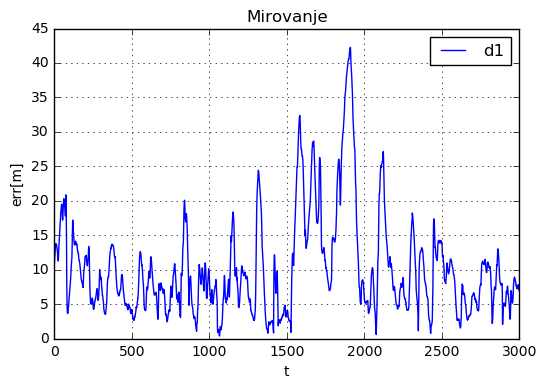

In [233]:
plt.plot(t, d1, color='b', label='d1');
plt.legend()
plt.title('Mirovanje')
plt.xlabel('t')
plt.ylabel('err[m]')
plt.grid(True)

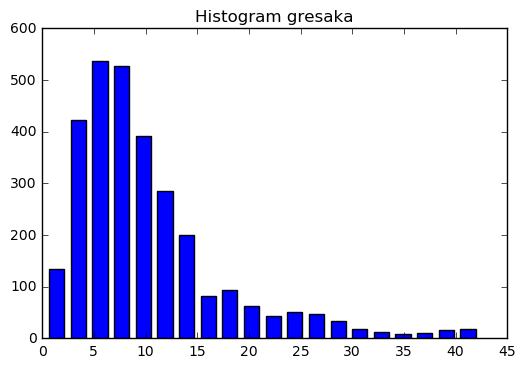

In [235]:
plt.title('Histogram gresaka')
hist, bins = np.histogram(d1, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()